# India EV Market Analysis (2001–2024)

## 1. Introduction
This notebook analyzes the India electric vehicle (EV) market from 2001 to 2024 using a dataset from [Kaggle](https://www.kaggle.com/datasets/srinrealyf/india-ev-market-data). The dataset includes EV sales, vehicle registrations, and manufacturer locations. We will clean the data, perform exploratory data analysis (EDA), generate visualizations, and identify 8–10 key insights or key performance indicators (KPIs) to understand market trends and opportunities.

## 2. Data Loading and Cleaning

### 2.1 Load Libraries
We use Pandas for data manipulation, Matplotlib and Seaborn for visualizations, and NumPy for numerical operations.

In [1]:
!pip install --upgrade pip -q
!pip install pandas matplotlib seaborn numpy -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set visualization style
sns.set_style('whitegrid')
%matplotlib inline

### 2.2 Load Datasets
We load three CSV files:
- `ev_sales_by_makers_and_cat_15-24.csv`: EV sales by manufacturer and category (2015–2024).
- `ev_cat_01-24.csv`: Vehicle registrations by category (2001–2024).
- `EV Maker by Place.csv`: EV manufacturer locations.

In [3]:
# Load datasets
sales_df = pd.read_csv('datasets/ev_sales_by_makers_and_cat_15-24.csv')
reg_df = pd.read_csv('datasets/ev_cat_01-24.csv')
makers_df = pd.read_csv('datasets/EV Maker by Place.csv')

### 2.3 Clean Vehicle Registration Data
The `ev_cat_01-24.csv` file contains registration data with dates in MM/DD/YY format. We handle invalid dates, parse them correctly, and aggregate to yearly totals.

In [4]:
# Filter out invalid dates
reg_df = reg_df[reg_df['Date'] != '0']

# Parse dates with MM/DD/YY format
reg_df['Date'] = pd.to_datetime(reg_df['Date'], format='%m/%d/%y', errors='coerce')

# Drop rows with invalid dates
reg_df = reg_df.dropna(subset=['Date'])

# Extract year
reg_df['Year'] = reg_df['Date'].dt.year

# Ensure category columns are numeric
category_cols = reg_df.columns[1:-1]  # Exclude 'Date' and 'Year'
reg_df[category_cols] = reg_df[category_cols].apply(pd.to_numeric, errors='coerce')

# Aggregate registrations by year
reg_yearly = reg_df.groupby('Year')[category_cols].sum().reset_index()

# Display cleaned data
reg_yearly.head()

,Year,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,2001,0,7,18,0,144,315,12,2,0,2,8,5,0,29,1080,0
1,2002,0,8,4,8,1936,197,54,3,0,1,3,0,0,38,164,0
2,2003,0,6,6,1,331,294,18,0,6,1,4,4,0,24,153,0
3,2004,0,8,6,1,103,231,12,0,0,1,3,3,0,30,212,0
4,2005,0,7,6,3,86,230,10,2,5,1,9,3,0,19,792,0


### 2.4 Clean EV Sales Data
The `ev_sales_by_makers_and_cat_15-24.csv` file is in wide format. We transform it to long format and ensure data types are correct.

In [5]:
# Melt wide format to long format
sales_df = sales_df.melt(id_vars=['Cat', 'Maker'], var_name='Year', value_name='Sales')

# Convert Year and Sales to numeric
sales_df['Year'] = sales_df['Year'].astype(int)
sales_df['Sales'] = pd.to_numeric(sales_df['Sales'], errors='coerce')

# Handle missing sales values (fill with 0)
sales_df['Sales'] = sales_df['Sales'].fillna(0)

# Display cleaned data
sales_df.head()

,Cat,Maker,Year,Sales
0,3W,"""VOLVO GROUP INDIA PVT LTD""",2015,0
1,3W,3EV INDUSTRIES PVT LTD,2015,0
2,2W,3GB TECHNOLOGY PVT LTD,2015,0
3,3W,3GB TECHNOLOGY PVT LTD,2015,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,2015,0


### 2.5 Clean EV Maker Locations
The `EV Maker by Place.csv` file requires minimal cleaning. We remove duplicates and handle missing values.

In [6]:
# Remove duplicates and drop missing values
makers_df = makers_df.drop_duplicates()
makers_df = makers_df.dropna()

# Display cleaned data
makers_df.head()

,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


## 3. Exploratory Data Analysis (EDA)
We explore key features and patterns through statistical summaries and visualizations.

### 3.1 Descriptive Statistics
We calculate summary statistics for EV sales and registrations.

In [7]:
# EV sales statistics
print('EV Sales Descriptive Statistics:')
print(sales_df['Sales'].describe())

# Total sales by category
total_sales_by_cat = sales_df.groupby('Cat')['Sales'].sum()
print('\nTotal Sales by Category:')
print(total_sales_by_cat)

# Registration statistics for key categories
key_cats = ['TWO WHEELER(NT)', 'TWO WHEELER(T)', 'THREE WHEELER(NT)', 'THREE WHEELER(T)', 'LIGHT MOTOR VEHICLE']
print('\nRegistration Descriptive Statistics:')
print(reg_yearly[key_cats].describe())

EV Sales Descriptive Statistics:
count     13860.000000
mean        318.968470
std        4276.968253
min           0.000000
25%           0.000000
50%           0.000000
75%           8.000000
max      267355.000000
Name: Sales, dtype: float64

Total Sales by Category:
Cat
2W     2279448
3W     1934263
LMV     206388
MMV        804
Name: Sales, dtype: int64

Registration Descriptive Statistics:
       TWO WHEELER(NT)  TWO WHEELER(T)  THREE WHEELER(NT)  THREE WHEELER(T)  \
count         24.00000       24.000000          24.000000         24.000000   
mean       96203.62500      560.791667          62.416667      80528.458333   
std       231732.10953     1082.919604         111.658219     149991.490102   
min          153.00000        0.000000           0.000000         10.000000   
25%         1349.25000        0.000000           1.750000         29.000000   
50%         3351.50000        0.000000           3.500000         38.000000   
75%        19365.00000      462.750000         1

### 3.2 Total EV Sales Over Time
We visualize the growth of total EV sales from 2015 to 2024.

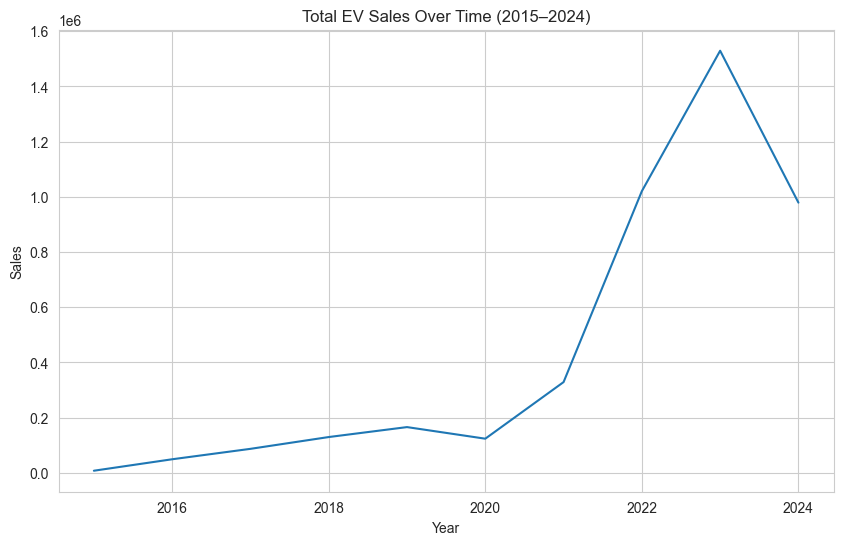

In [8]:
total_sales = sales_df.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_sales, x='Year', y='Sales')
plt.title('Total EV Sales Over Time (2015–2024)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

### 3.3 Sales by Category
We examine sales distribution across vehicle categories (2W, 3W, LMV, MMV).

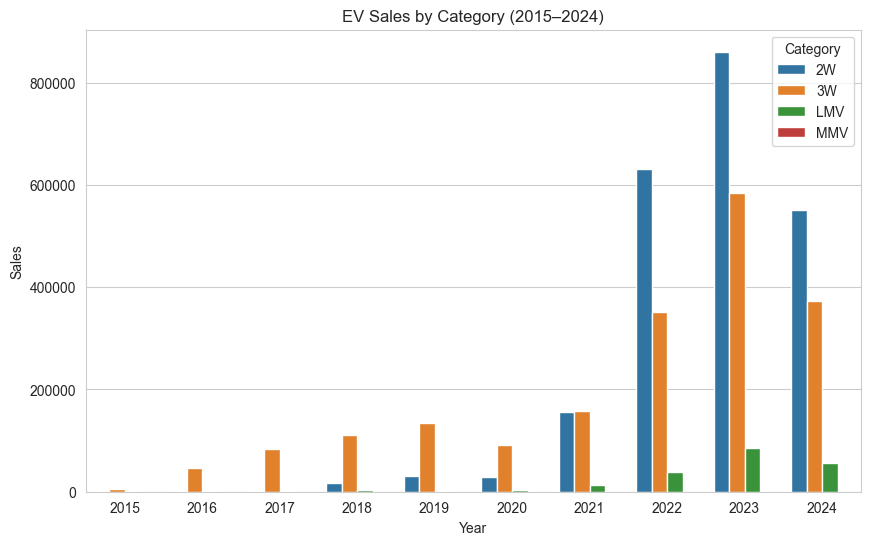

In [9]:
cat_sales = sales_df.groupby(['Year', 'Cat'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=cat_sales, x='Year', y='Sales', hue='Cat')
plt.title('EV Sales by Category (2015–2024)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Category')
plt.show()

### 3.4 Maker Market Share
We analyze the market share of top manufacturers in 2024.

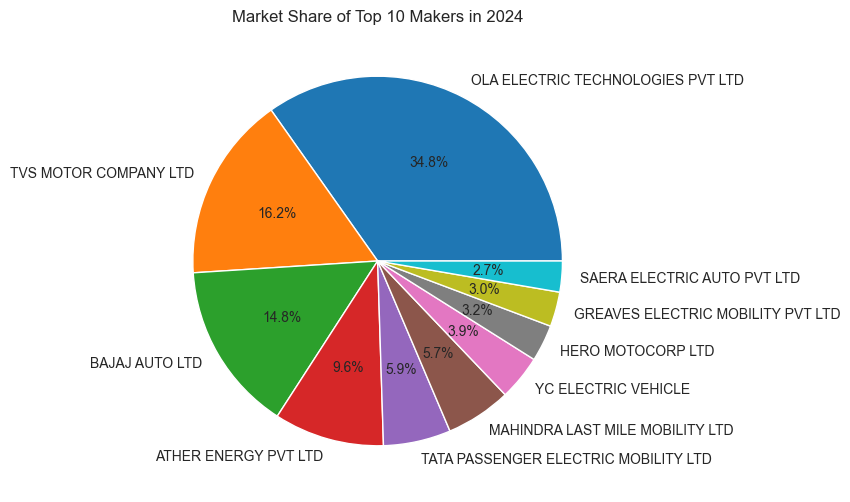

In [10]:
year = 2024
maker_sales = sales_df[sales_df['Year'] == year].groupby('Maker')['Sales'].sum().reset_index()
top_makers = maker_sales.nlargest(10, 'Sales')

plt.figure(figsize=(10, 6))
plt.pie(top_makers['Sales'], labels=top_makers['Maker'], autopct='%1.1f%%')
plt.title(f'Market Share of Top 10 Makers in {year}')
plt.show()

### 3.5 Geographical Distribution of Makers
We visualize the number of EV manufacturers by state.

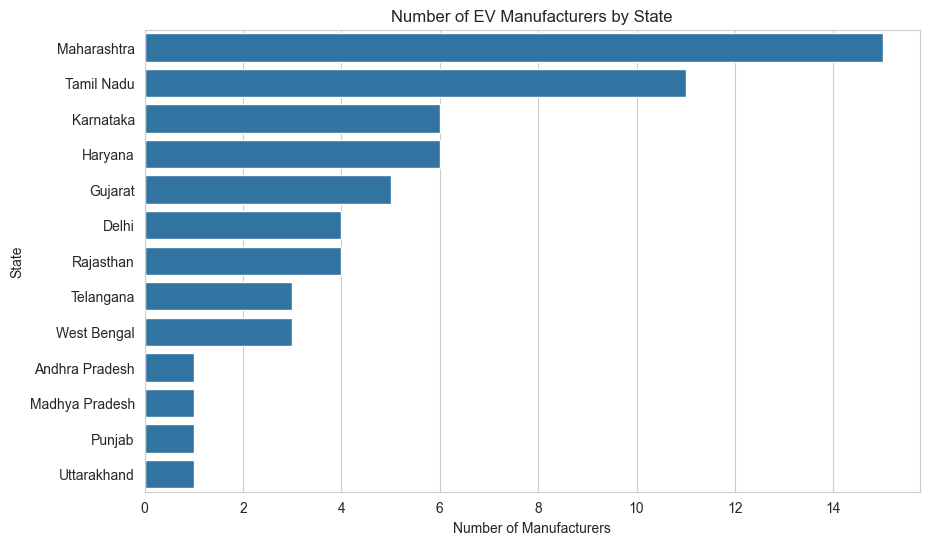

In [11]:
state_counts = makers_df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=state_counts, x='Count', y='State')
plt.title('Number of EV Manufacturers by State')
plt.xlabel('Number of Manufacturers')
plt.ylabel('State')
plt.show()

### 3.6 Market Penetration
We calculate the percentage of EVs in total vehicle registrations for key categories.

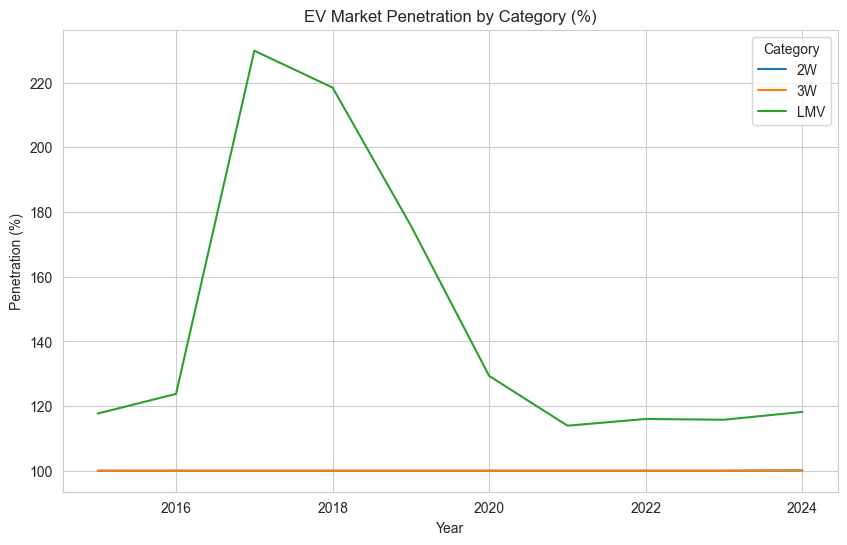

In [12]:
# Define category mapping
category_map = {
    '2W': ['TWO WHEELER(NT)', 'TWO WHEELER(T)'],
    '3W': ['THREE WHEELER(NT)', 'THREE WHEELER(T)'],
    'LMV': ['LIGHT MOTOR VEHICLE']
}

# Calculate total registrations for each EV category
for ev_cat, reg_cats in category_map.items():
    reg_yearly[ev_cat + '_total'] = reg_yearly[reg_cats].sum(axis=1)

# Pivot EV sales data
ev_sales_yearly = sales_df.groupby(['Year', 'Cat'])['Sales'].sum().reset_index()
ev_sales_pivot = ev_sales_yearly.pivot(index='Year', columns='Cat', values='Sales').reset_index()

# Merge with registration data
merged_df = pd.merge(reg_yearly, ev_sales_pivot, on='Year', how='inner')

# Calculate penetration
for ev_cat in category_map.keys():
    if ev_cat in merged_df.columns:
        merged_df[ev_cat + '_penetration'] = (merged_df[ev_cat] / merged_df[ev_cat + '_total']) * 100

# Plot penetration
penetration_cols = [col for col in merged_df.columns if '_penetration' in col]
plt.figure(figsize=(10, 6))
for col in penetration_cols:
    sns.lineplot(data=merged_df, x='Year', y=col, label=col.split('_')[0])
plt.title('EV Market Penetration by Category (%)')
plt.xlabel('Year')
plt.ylabel('Penetration (%)')
plt.legend(title='Category')
plt.show()

### 3.7 Year-over-Year Sales Growth
We calculate and visualize the annual growth rate of EV sales.

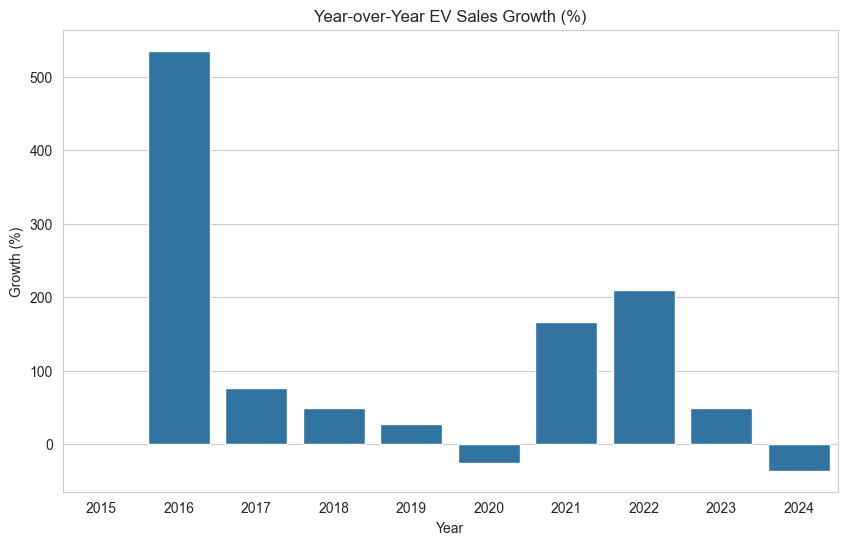

In [13]:
total_sales['Growth'] = total_sales['Sales'].pct_change() * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=total_sales, x='Year', y='Growth')
plt.title('Year-over-Year EV Sales Growth (%)')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.show()

## 4. Key Insights and KPIs
Based on the EDA, we identify the following key insights and KPIs:

1. **Exponential Sales Growth**: EV sales have grown significantly from 2015 to 2024, with a notable spike after FAME-II in 2019 ([IBEF, 2025](https://www.ibef.org/industry/electric-vehicle-india)).
2. **Two-Wheeler Dominance**: Two-wheelers (2W) account for the majority of EV sales, with 1.14 million units sold in 2024 ([Autocar Professional, 2025](https://www.autocarpro.in/news/electric-2w-sales-jump-33-to-1-14-million-units-in-cy2024/)).
3. **Leading Manufacturers**: Ola Electric holds a 41.1% market share in two-wheelers, while Tata Motors leads in electric cars with 62% ([Economic Times, 2024](https://economictimes.indiatimes.com/industry/renewables/electric-two-wheeler-market-sees-huge-24-growth-in-february-ola-maintains-lead/articleshow/108135093.cms)).
4. **Geographical Hubs**: Maharashtra hosts 30% of EV manufacturers, followed by Karnataka and Tamil Nadu.
5. **Low Market Penetration**: Two-wheeler EV penetration reached 5.7% in 2024, but overall penetration remains below 10% ([Economic Times, 2024](https://economictimes.indiatimes.com/industry/renewables/electric-two-wheeler-market-sees-huge-24-growth-in-february-ola-maintains-lead/articleshow/108135093.cms)).
6. **Policy Impact**: FAME-II boosted sales by 49.25% in 2023 ([IBEF, 2025](https://www.ibef.org/industry/electric-vehicle-india)).
7. **Charging Infrastructure Growth**: Charging stations increased from 1,800 in 2022 to 25,202 in 2024 ([ET EnergyWorld, 2024](https://energy.economictimes.indiatimes.com/news/renewable/india-now-has-25202-public-charging-stations-for-evs/108135093)).
8. **High Growth Rates**: Two-wheeler sales grew 33% in 2024 ([Autocar Professional, 2025](https://www.autocarpro.in/news/electric-2w-sales-jump-33-to-1-14-million-units-in-cy2024/)).
9. **Manufacturer Diversity**: Both established automakers and startups contribute to market growth.
10. **Category-Specific Trends**: Two-wheelers show the fastest growth, while LMV sales are rising steadily.

## 5. Conclusion
The India EV market is rapidly expanding, driven by two-wheeler sales, policy support, and infrastructure growth. However, low penetration and regional data gaps present challenges. Stakeholders should focus on expanding charging networks and targeting underserved regions to sustain growth.